# Аналитика с июля по август 2024 года и reach rate

__Загружаем библиотеки и добавлеям данные о динамике подписчиков.__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
subs = pd.read_excel('подписчики.xlsx')
df = pd.read_excel("all_data_cleaned.xlsx")
df['month'] = df['date'].dt.month
df['join'] = df['formatted_date'].astype(str) + '-' + df['bank'].astype(str)

days_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Convert the 'day_of_week_russian' column to a categorical type with the specified order
df['day_of_week_russian'] = pd.Categorical(df['day_of_week_russian'], categories=days_order, ordered=True)


In [7]:
reach_rate = subs.merge(df[[ 'day_of_week', 'day_of_week_russian', 'hour', 'text_post',
       'accumulative_reaction', 'views', 'forwards', 'reaction_dict',
       'video.duration',  'video_note.duration', 'month', 
       'animation.duration', 'join'
                            
                           ]], on ='join', how = 'left' )
reach_rate['reach_rate'] = reach_rate['views'] / reach_rate['amount'] * 100

In [8]:
reach_rate[['reach_rate', 'growth', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('reach_rate', ascending = False)

,reach_rate,growth,forwards,accumulative_reaction
reach_rate,1.000000,-0.035412,0.220810,0.049923
forwards,0.220810,0.000283,1.000000,0.446451
accumulative_reaction,0.049923,0.035275,0.446451,1.000000
growth,-0.035412,1.000000,0.000283,0.035275


*```Reach_rate```* наиболее скоррелирован с числом репостов, однако корреляция совсем слабая (просмотры и число подписчиков не учтены т к они фактически формируют reach_rate). То есть чем больше охват, тем больше пересылок.

Интересно, что увеличения охвата (reach_rate) отрицательно скоррелирона с приростом числа подписчиков, но корреляция очень слабая.

Далее рассмотрим подробнее динамику роста подписчиков и reach_rate в зависимости от дня недели и часа, месяца, формата медиа и тематики поста. 

### Динамика прироста подписчиков

In [9]:
reach_rate[[ 'growth',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('growth', ascending = False)

,growth,views,forwards,accumulative_reaction
growth,1.000000,-0.047272,0.000283,0.035275
accumulative_reaction,0.035275,0.332579,0.446451,1.000000
forwards,0.000283,0.545116,1.000000,0.446451
views,-0.047272,1.000000,0.545116,0.332579


In [23]:
reach_rate[[ 'amount',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('amount', ascending = False)

,amount,views,forwards,accumulative_reaction
amount,1.000000,0.595592,0.441330,0.478791
views,0.595592,1.000000,0.545116,0.332579
accumulative_reaction,0.478791,0.332579,0.446451,1.000000
forwards,0.441330,0.545116,1.000000,0.446451


Корреляции с  динамикой числа подписчиков весьма слабые. Зато корреляция числа подписчиков более стат значимы, так число подписчиков сильно скорелиовано с число просмотров и средней положеительной реакцией пользователей. То есть **чем больше подписчиков, тем больше просмотров и более положительная реакция, и наборот**  

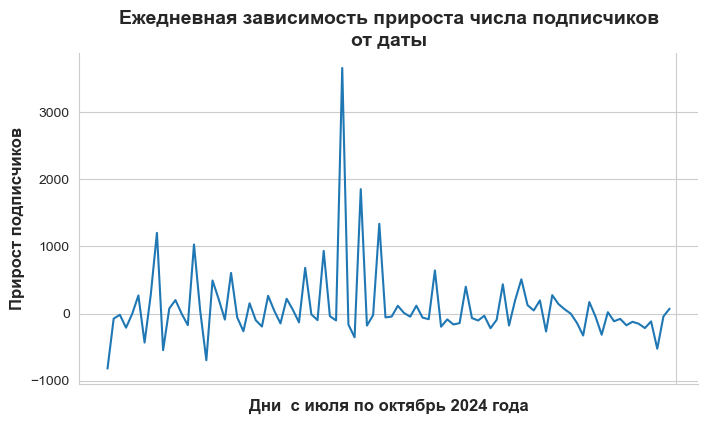

In [25]:
growth_data = reach_rate.groupby('date', 
                      as_index = False)['growth'].mean().sort_values('date')
sns.relplot(data = growth_data, x = 'date', y = 'growth', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость прироста числа подписчиков\nот даты', fontsize=14, fontweight ='bold')
plt.xlabel('Дни  с июля по октябрь 2024 года', fontsize=12,  fontweight ='bold')
plt.ylabel('Прирост подписчиков', fontsize=12, fontweight ='bold')
plt.xticks('');
plt.show();

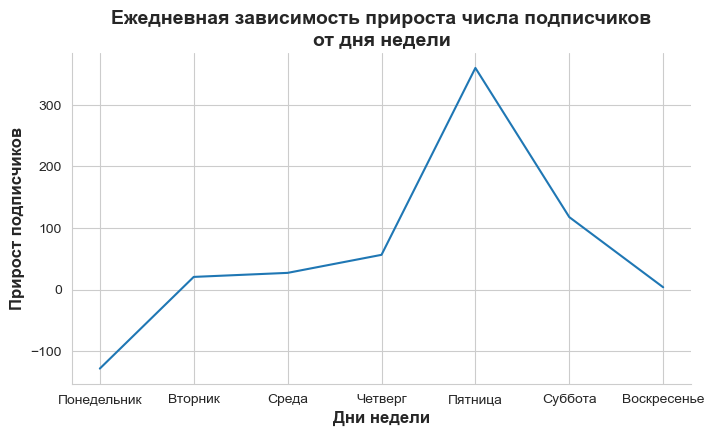

In [37]:
growth_data = reach_rate.groupby('day_of_week_russian', observed = False, 
                      as_index = False)['growth'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'growth', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость прироста числа подписчиков\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Прирост подписчиков', fontsize=12, fontweight ='bold')
plt.show();

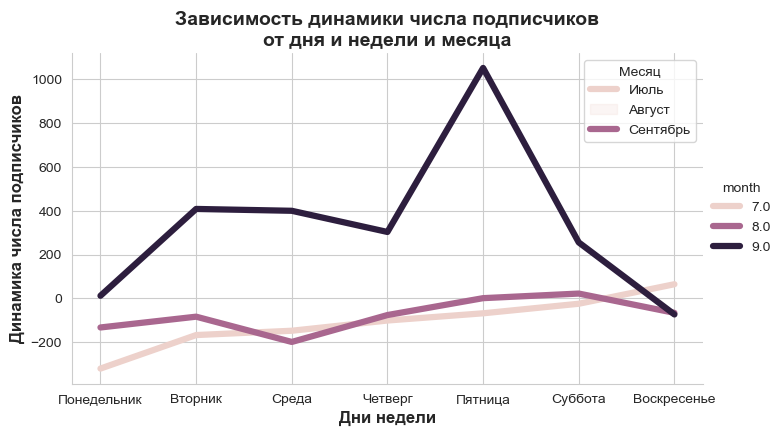

In [39]:

growth_data = reach_rate.groupby(['day_of_week_russian', 'month' ], observed = False, 
                      as_index = False)['growth'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'growth', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость динамики числа подписчиков\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Динамика числа подписчиков', fontsize=12, fontweight ='bold')
plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

 - Наибольшее число подписчиков происходит в пятницу, положительная динамика медленно увеличивается с понедельника, с вторника по четверг выходит на плато, резкий рост в пятницу, и падение в выходные.  
 - В среднем наибольшая положительная динамика наблюдалась в сентябрь, с положительными пиками во вторник и пятницу, и отрицательными пиками в св понедельник и выходные.
 - В июле и августе линии более плавные, также наибольшее число отписок в понедельник. 

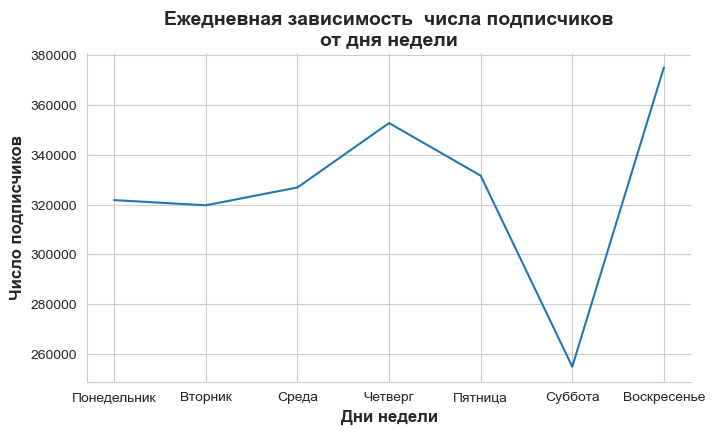

In [40]:
growth_data = reach_rate.groupby('day_of_week_russian', observed=False, 
                      as_index = False)['amount'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'amount', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость  числа подписчиков\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Число подписчиков', fontsize=12, fontweight ='bold')
plt.show();

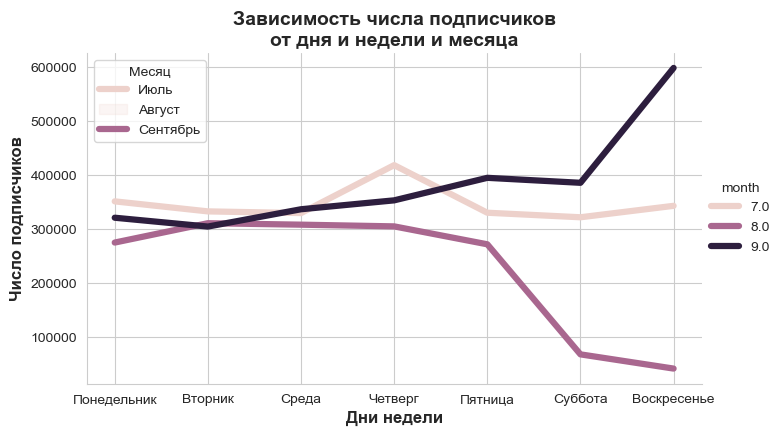

In [41]:
growth_data = reach_rate.groupby(['day_of_week_russian', 'month' ], observed = False, 
                      as_index = False)['amount'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'amount', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость числа подписчиков\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Число подписчиков', fontsize=12, fontweight ='bold')
plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

Если смотреть не динамику числа подписчиков, а само число подписчиков то получается немного иная картина:

 - По дням недели пик подписчиков в четверг и воскресение, а главный отрицательный пик - суббота
 - Если смотреть по месяцам, то вновь сентябрь вырывается вперед, причем для него  происходит увеличение подписчиков даже в выходные. Интересно, что пик по числу подписчиков есть только в июле. 
В остальном месяца сильно схожи по числу подписчиков
 - Результаты вполне ожидаемы, динамика числа подписчиков фактически выполняет роль *производной* для числа подписчиков, с этим связаны те или иные "несостыковки". Также объяснима разница по месяцам, видно, что в августе и июле пользователи стараются отдыхать (особенно в августе) и меньше вовлечены в телеграм активность, чаще отписываются
 - Далее будем скорее использовать именно динамику прироста

### Reach rate

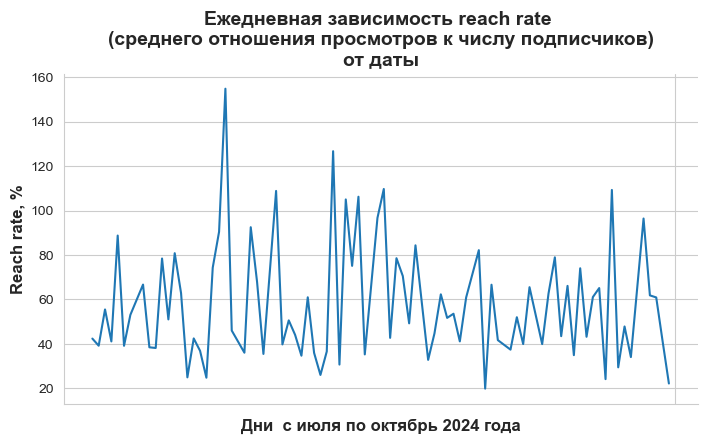

In [5]:
reach_data = reach_rate.groupby('date', 
                      as_index = False)['reach_rate'].mean().sort_values('date')
sns.relplot(data = reach_data, x = 'date', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот даты', fontsize=14, fontweight ='bold')
plt.xlabel('Дни  с июля по октябрь 2024 года', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate, %', fontsize=12, fontweight ='bold')
plt.xticks('');
plt.show();

Даже линия по усредненному по дням значение очень ломанная, потсмотрим зависимость от дня недели и месяца. 

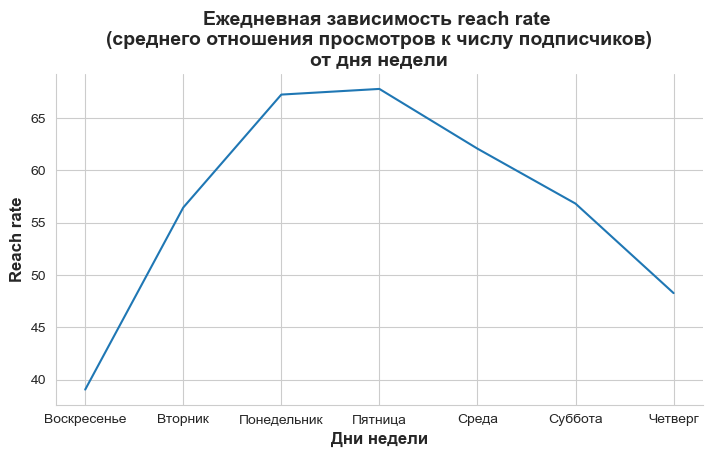

In [7]:
reach_data = reach_rate.groupby('day_of_week_russian', 
                      as_index = False)['reach_rate'].mean()
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.show();

In [ ]:
По дням недели - наибольший охват достигается в пятницу, то есть или все больше и больше пользователей просматривают пост, и максимум этих просмотров дотсигается в пятницу

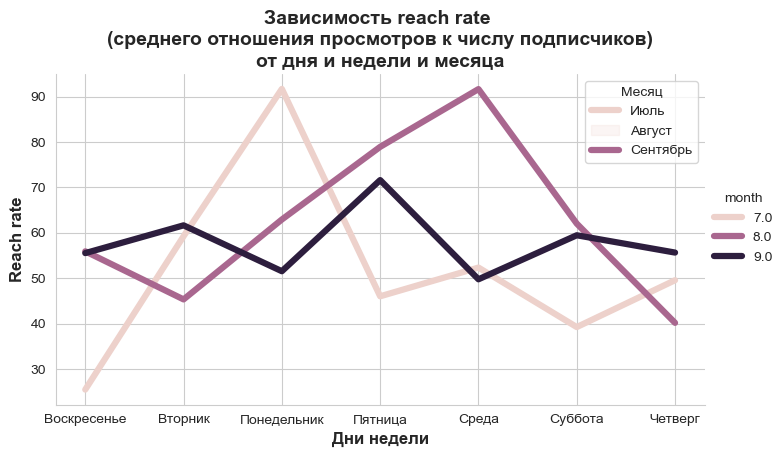

In [10]:
reach_data = reach_rate.groupby(['day_of_week_russian', 'month'], 
                      as_index = False)['reach_rate'].mean()
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

### Число подписчиков и динамика числа подписчиков

In [17]:
reach_rate[[ 'amount',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('amount', ascending = False)

,amount,views,forwards,accumulative_reaction
amount,1.000000,0.595592,0.441330,0.478791
views,0.595592,1.000000,0.545116,0.332579
accumulative_reaction,0.478791,0.332579,0.446451,1.000000
forwards,0.441330,0.545116,1.000000,0.446451


In [18]:
reach_rate[[ 'growth',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('growth', ascending = False)

,growth,views,forwards,accumulative_reaction
growth,1.000000,-0.047272,0.000283,0.035275
accumulative_reaction,0.035275,0.332579,0.446451,1.000000
forwards,0.000283,0.545116,1.000000,0.446451
views,-0.047272,1.000000,0.545116,0.332579


In [ ]:
Число подспичиков наиболее скоррелировано с числом просмотров, то есть чем больше просмотров - тем больше про

In [3]:
growth_data = df.groupby('date', 
                      as_index = False)['growth'].mean().sort_values('date')
sns.relplot(data = growth_data, x = 'day', y = 'growth', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость числа просмотров постов от дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('День недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Число просмотров', fontsize=12, fontweight ='bold')
plt.show();

KeyError: 'Column not found: growth'

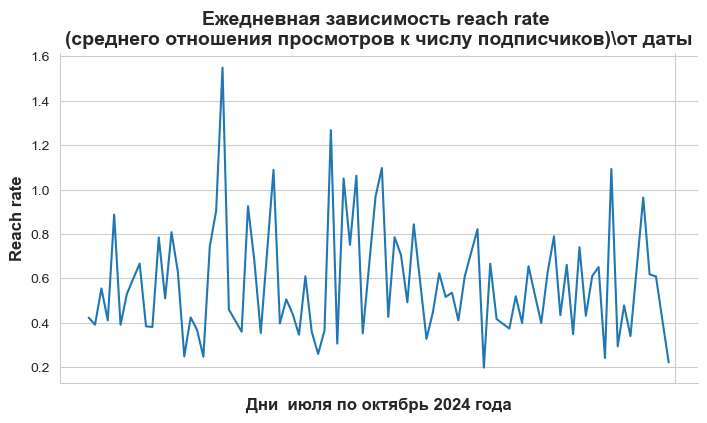

In [18]:
reach_data = reach_rate.groupby('date', 
                      as_index = False)['reach_rate'].mean().sort_values('date')
sns.relplot(data = reach_data, x = 'date', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\от даты', fontsize=14, fontweight ='bold')
plt.xlabel('Дни  июля по октябрь 2024 года', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.xticks('');
plt.show();

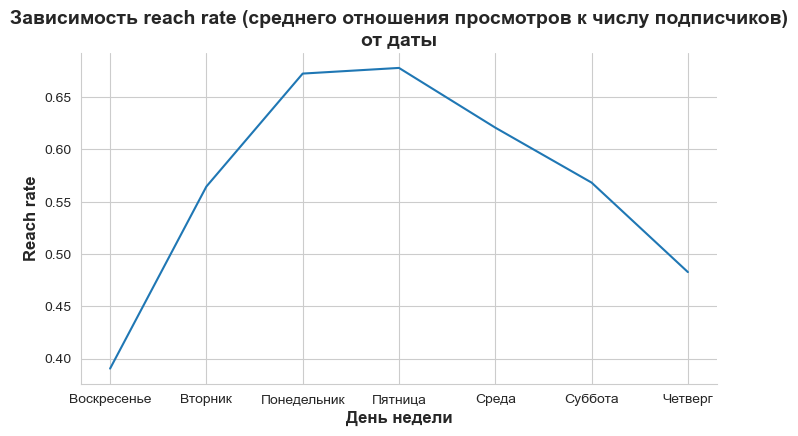

In [69]:
reach_data = reach_rate.groupby('day_of_week_russian', 
                      as_index = False)['reach_rate'].mean()
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость reach rate (среднего отношения просмотров к числу подписчиков)\nот даты', fontsize=14, fontweight ='bold')
plt.xlabel('День недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.show();

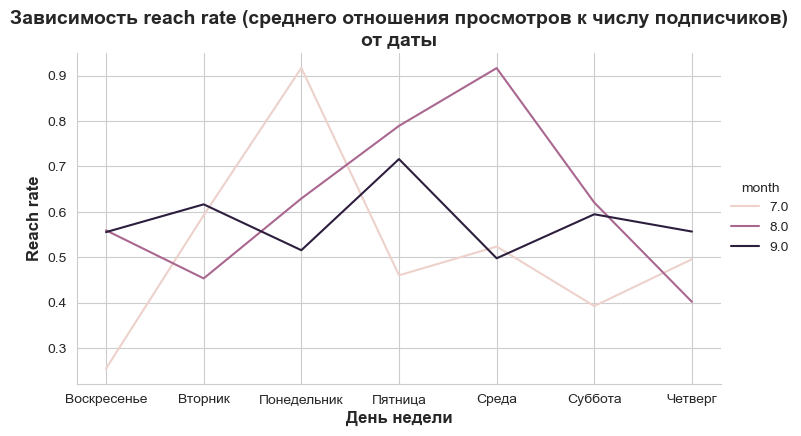

In [84]:
palette_days =['#e6194b', '#3cb44b', '#e6194B', '#4363d8', '#f58231', '#911eb4', '#f032e6']

reach_data = reach_rate.groupby(['day_of_week_russian', 'month'],
                      as_index = False)['reach_rate'].mean()
months = {
    '
}
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', hue = 'month',
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость reach rate (среднего отношения просмотров к числу подписчиков)\nот даты', fontsize=14, fontweight ='bold',)
plt.xlabel('День недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.show();